**INSTALACIÓN DE LAS LIBRERIAS**

In [ ]:
!pip install numpy pandas matplotlib seaborn

**IMPORTACIÓN DE LAS LIBRERIAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LECTURA DEL DATASET**

In [ ]:
path = '/content/vgsales.csv'
data = pd.read_csv(path, encoding='windows-1252' )

**VERFICACIÓN DE LAS COLUMNAS Y TIPOS DE DATOS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**INSPECCIÓN INICIAL AL DATASET**

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**CONTEO DE VALORES NULOS**

In [ ]:
# Conteo de nulos por columna
print(data.isnull().sum())

# Conteo total de nulos en todo el DataFrame
print("Total de nulos:", data.isnull().sum().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Total de nulos: 329


**ELIMINACIÓN DE FILAS CON VALORES FALTANTES EN LA COLUMNA 'YEAR' Y MANEJO DE VALORES FALTANTES EN LA COLUMNA 'PUBLISHER'**

In [ ]:
data = data.dropna(subset=['Year'])
data['Publisher'] = data['Publisher'].fillna('Unknown')
# Conteo de nulos por columna
print(data.isnull().sum())

# Conteo total de nulos en todo el DataFrame
print("Total de nulos:", data.isnull().sum().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Total de nulos: 0


**AJUSTE DE TIPOS DE DATOS**

In [ ]:
data["Year"] = data["Year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**VERIFICACIÓN DE FILAS DUPLICADAS**

In [ ]:
# Número total de filas duplicadas (completas)
print("Duplicados en todo el DataFrame:", data.duplicated().sum())
# Verificar duplicados con columnas clave
duplicados_exactos = data[data.duplicated(
    subset=["Name", "Platform", "Year", "Publisher"],
    keep=False
)]
print(duplicados_exactos.head(20))


Duplicados en todo el DataFrame: 0
        Rank           Name Platform  Year   Genre        Publisher  NA_Sales  \
603      604  Madden NFL 13      PS3  2012  Sports  Electronic Arts      2.11   
16127  16130  Madden NFL 13      PS3  2012  Sports  Electronic Arts      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
603        0.23       0.0         0.22          2.56  
16127      0.01       0.0         0.00          0.01  


In [ ]:
data = data.drop_duplicates(subset=["Name", "Platform", "Year", "Publisher"], keep="first")

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**CREACIÓN DE NUEVAS COLUMNAS**

In [ ]:
def clasificar_ventas(ventas):
    if ventas < 0.5:
        return "Bajo rendimiento"
    elif ventas < 1:
        return "Rendimiento moderado"
    elif ventas < 10:
        return "Million Seller"
    else:
        return "Superventas"

data["Ventas_Nivel"] = data["Global_Sales"].apply(clasificar_ventas)

In [ ]:
def clasificar_periodo(year):
    if pd.isna(year):
        return "Desconocido"
    elif year < 2000:
        return "Retro"
    elif 2000 <= year <= 2010:
        return "Clásicos"
    else:
        return "Modernos"

data["Periodo"] = data["Year"].apply(clasificar_periodo)

In [ ]:
print(data[["Name", "Global_Sales", "Ventas_Nivel", "Year", "Periodo"]].head(20))

                                            Name  Global_Sales Ventas_Nivel  \
0                                     Wii Sports         82.74  Superventas   
1                              Super Mario Bros.         40.24  Superventas   
2                                 Mario Kart Wii         35.82  Superventas   
3                              Wii Sports Resort         33.00  Superventas   
4                       Pokemon Red/Pokemon Blue         31.37  Superventas   
5                                         Tetris         30.26  Superventas   
6                          New Super Mario Bros.         30.01  Superventas   
7                                       Wii Play         29.02  Superventas   
8                      New Super Mario Bros. Wii         28.62  Superventas   
9                                      Duck Hunt         28.31  Superventas   
10                                    Nintendogs         24.76  Superventas   
11                                 Mario Kart DS    

In [ ]:
pd.concat([data.head(5), data.tail(5)])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ventas_Nivel,Periodo
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Superventas,Clásicos
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Superventas,Retro
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Superventas,Clásicos
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Superventas,Clásicos
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Superventas,Retro
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos


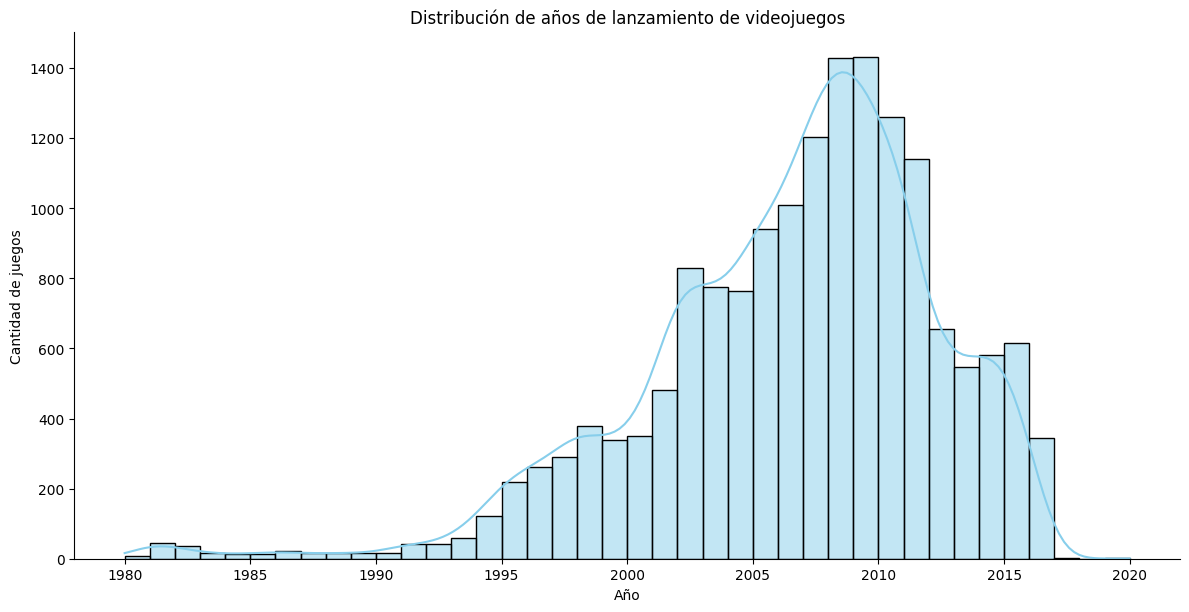

In [ ]:

sns.displot(data=data, x="Year", kde=True, bins=40, color="skyblue", height = 6, aspect = 2)
plt.title("Distribución de años de lanzamiento de videojuegos")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.show()


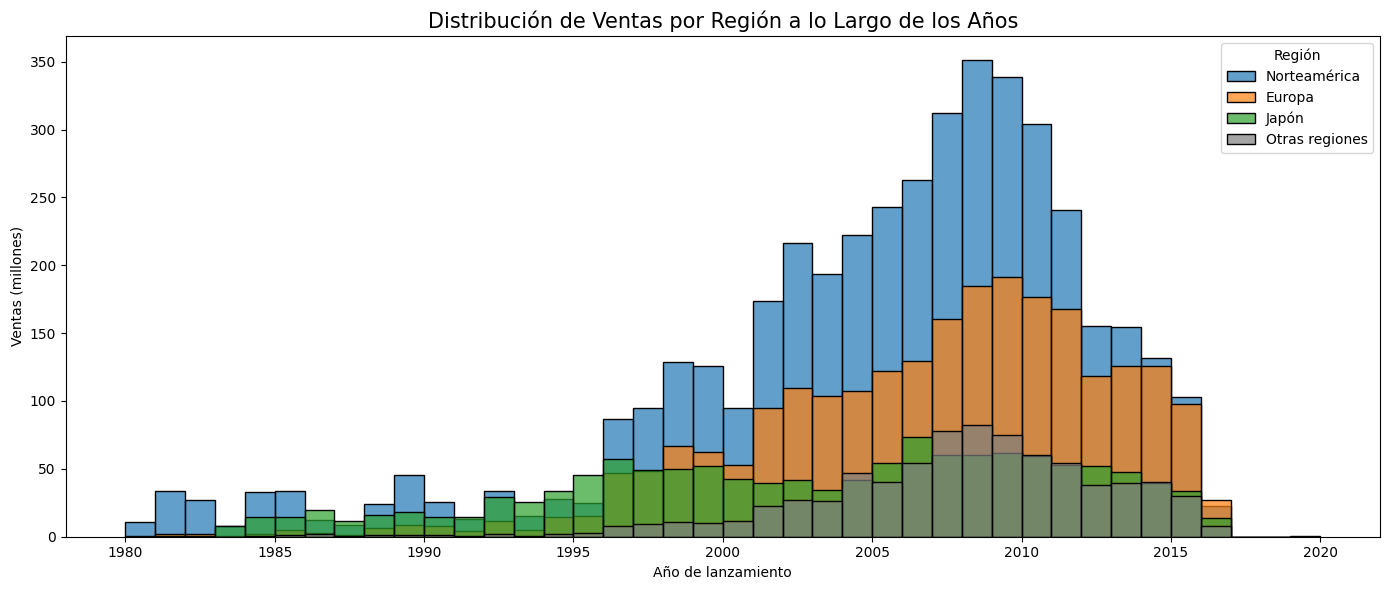

In [ ]:
plt.figure(figsize=(14, 6))

sns.histplot(data=data, x="Year", weights="NA_Sales", bins=40, color="#1f77b4", label="Norteamérica", alpha=0.7)
sns.histplot(data=data, x="Year", weights="EU_Sales", bins=40, color="#ff7f0e", label="Europa", alpha=0.7)
sns.histplot(data=data, x="Year", weights="JP_Sales", bins=40, color="#2ca02c", label="Japón", alpha=0.7)
sns.histplot(data=data, x="Year", weights="Other_Sales", bins=40, color="#7f7f7f", label="Otras regiones", alpha=0.7)

plt.title("Distribución de Ventas por Región a lo Largo de los Años", fontsize=15)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas (millones)")
plt.legend(title="Región")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3534040625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


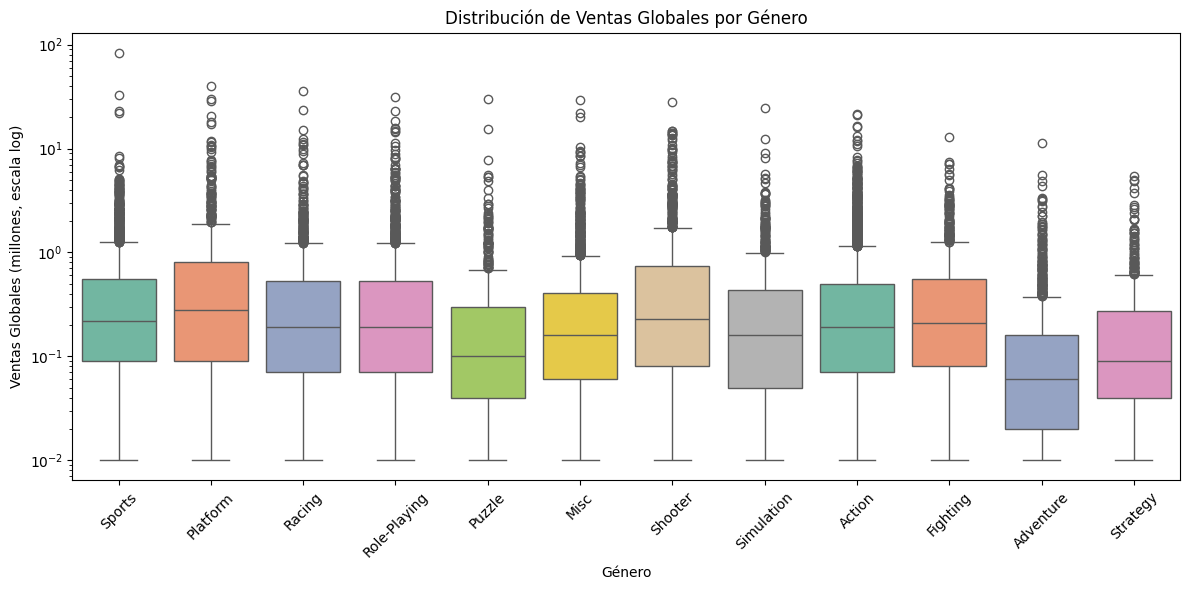

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x="Genre",
    y="Global_Sales",
    palette="Set2"
)

plt.yscale("log")
plt.title("Distribución de Ventas Globales por Género")
plt.xlabel("Género")
plt.ylabel("Ventas Globales (millones, escala log)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1785898243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


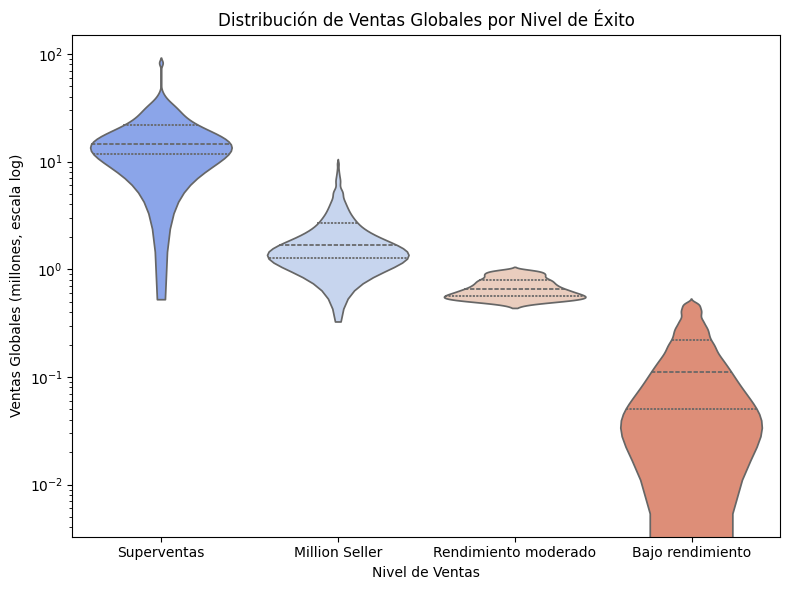

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=data,
    x="Ventas_Nivel",
    y="Global_Sales",
    palette="coolwarm",
    inner="quartile"
)
plt.yscale("log")
plt.title("Distribución de Ventas Globales por Nivel de Éxito")
plt.xlabel("Nivel de Ventas")
plt.ylabel("Ventas Globales (millones, escala log)")
plt.tight_layout()
plt.show()


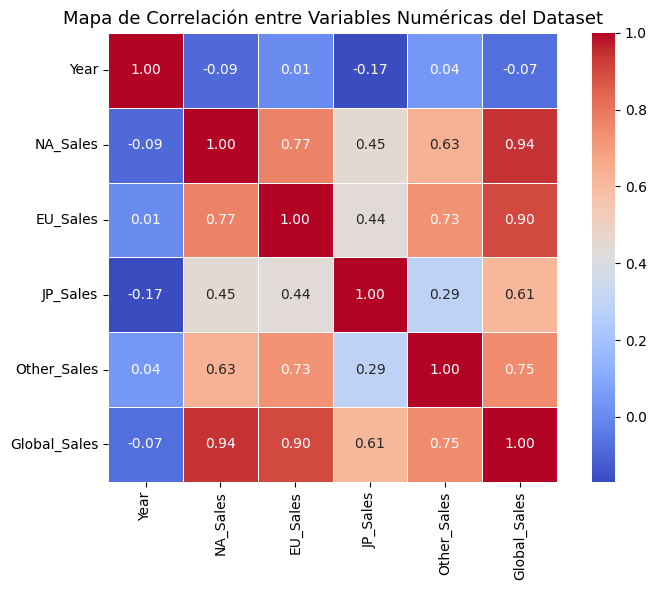

In [ ]:
corr_data = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

# Calcular la matriz de correlación
corr_matrix = corr_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True
)

plt.title("Mapa de Correlación entre Variables Numéricas del Dataset", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
!pip install dash==2.11.1 jupyter-dash==0.4.2 plotly==5.24.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.2
    Uninstalling Flask-3.1.2:
      Successfully uninstalled Flask-3.1.2


📌 Estadísticas de años en los datos:
   - Rango: 1980 – 2020
   - Media: 2006.4
   - Desviación estándar: 5.8

📊 División de datos:
   - Training set: 13060 registros
   - Test set: 3266 registros

🔧 Entrenando modelo Gradient Boosting...
🔧 Entrenando modelo Random Forest...

📈 Evaluación del modelo en conjunto de prueba:

Gradient Boosting:
   - RMSE: 1.1082
   - MAE:  0.1659
   - R²:   0.7125

Random Forest:
   - RMSE: 1.3358
   - MAE:  0.2173
   - R²:   0.5822

Ensamble:
   - RMSE: 1.1819
   - MAE:  0.1791
   - R²:   0.6729

🔄 Validación cruzada (5-fold):
   - RMSE medio: 0.8110 (+/- 1.2888)

📊 Importancia de Features (Gradient Boosting):
             Feature  Importancia_GB  Importancia_RF
3           NA_Sales        0.877169        0.877134
0   Platform_encoded        0.032557        0.017588
2  Publisher_encoded        0.026808        0.033814
1      Genre_encoded        0.018237        0.012200
6       Year_squared        0.015736        0.012630
4        Year_zscore        0.00

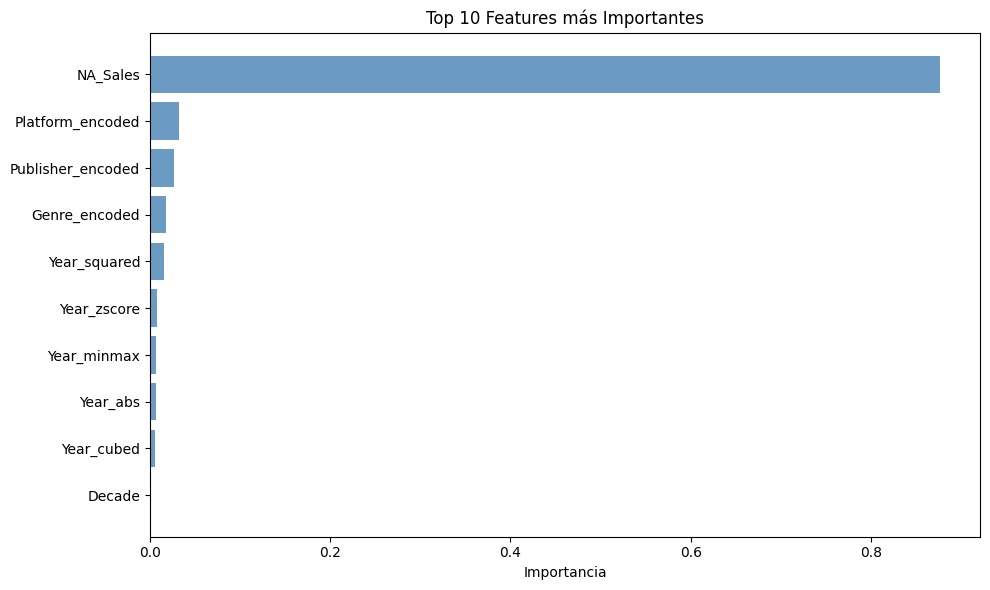

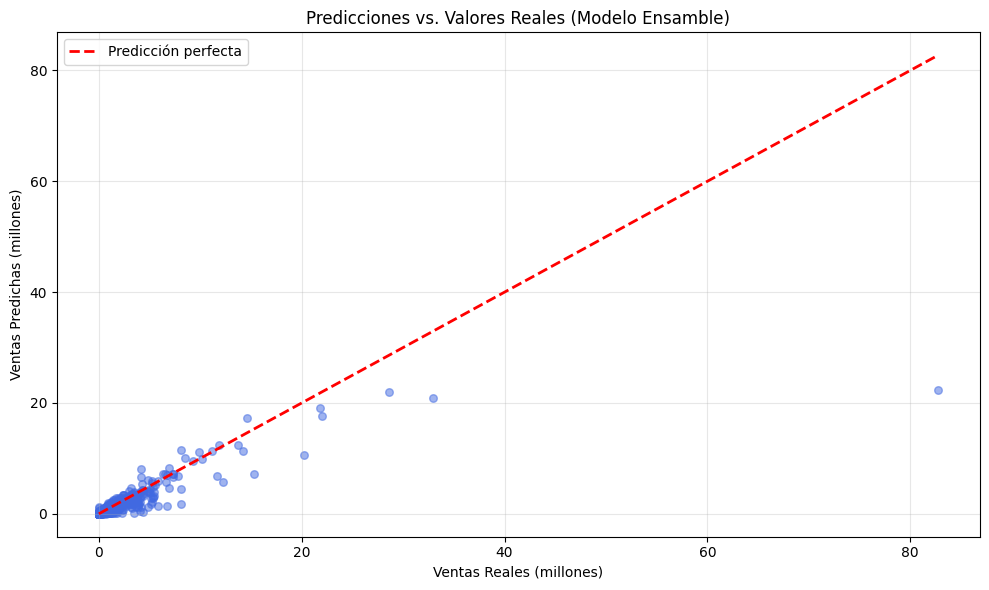

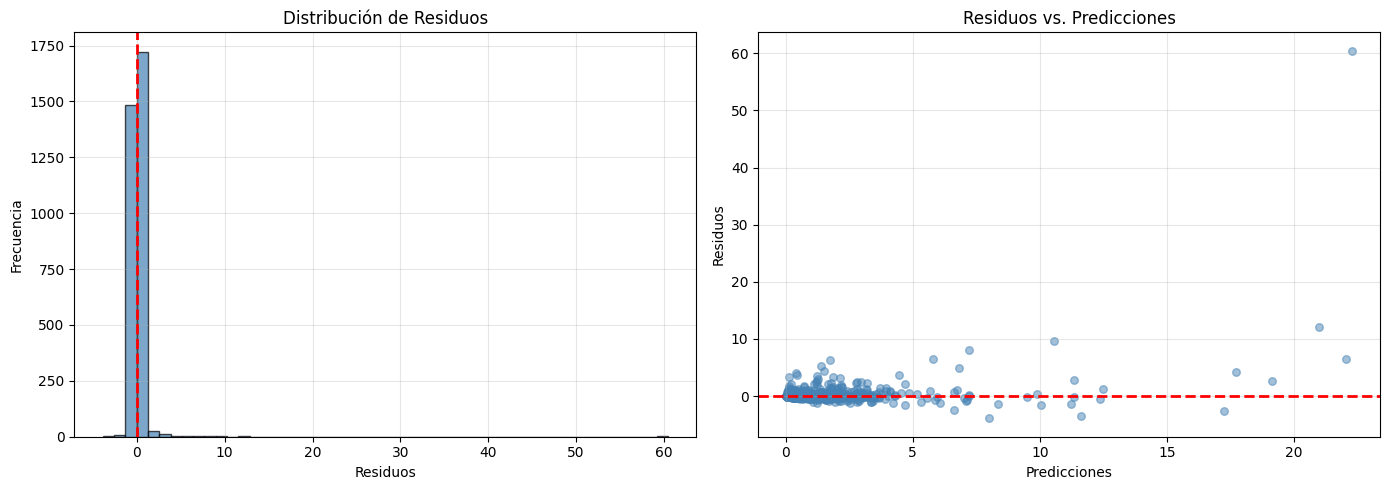


🧪 Probando el modelo con diferentes escenarios:

Caso 1: Plataforma, género o publisher desconocido

Caso 2: Plataforma, género o publisher desconocido

Caso 3: X360 - Shooter (2010)
  Predicción: 8.75 millones
  ✅ Interpolación (dentro del rango 1980-2020)
  Intervalo 95%: (np.float64(6.44), np.float64(11.06))

Caso 4: PS4 - Action (2030)
  Predicción: 2.46 millones
  ⚠️ Extrapolación futura (+10 años)
  Intervalo 95%: (np.float64(0.14), np.float64(4.77))

Caso 5: SNES - Platform (1992)
  Predicción: 5.33 millones
  ✅ Interpolación (dentro del rango 1980-2020)
  Intervalo 95%: (np.float64(3.02), np.float64(7.64))

💾 Guardando modelos y artefactos...
✅ Modelos guardados correctamente!

Archivos generados:
  - modelo_gb_videogames.pkl
  - modelo_rf_videogames.pkl
  - encoders_videogames.pkl
  - scaler_videogames.pkl
  - year_stats_videogames.pkl

🎯 MODELO MLOps COMPLETADO
✓ Modelo entrenado con 13060 registros
✓ R² en test: 0.6729
✓ RMSE en test: 1.1819
✓ Predicción robusta para cualqu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

df = data.copy()

year_stats = {
    'min': df["Year"].min(),
    'max': df["Year"].max(),
    'mean': df["Year"].mean(),
    'std': df["Year"].std()
}

print(f"📌 Estadísticas de años en los datos:")
print(f"   - Rango: {year_stats['min']} – {year_stats['max']}")
print(f"   - Media: {year_stats['mean']:.1f}")
print(f"   - Desviación estándar: {year_stats['std']:.1f}")

def crear_features_temporales(df, year_stats):
    """
    Crea features temporales robustas que funcionan tanto
    dentro como fuera del rango de entrenamiento
    """
    df["Year_zscore"] = (df["Year"] - year_stats['mean']) / year_stats['std']

    df["Year_minmax"] = (df["Year"] - year_stats['min']) / (year_stats['max'] - year_stats['min'])

    df["Year_squared"] = df["Year_zscore"] ** 2
    df["Year_cubed"] = df["Year_zscore"] ** 3

    df["Year_abs"] = df["Year"]

    df["Decade"] = (df["Year"] // 10) * 10
    df["Era"] = pd.cut(df["Year"],
                       bins=[1980, 1995, 2005, 2015, 2025],
                       labels=[0, 1, 2, 3],
                       include_lowest=True).astype(int)

    return df

df = crear_features_temporales(df, year_stats)

categorical_features = ["Platform", "Genre", "Publisher"]
encoders = {}

for col in categorical_features:
    encoders[col] = LabelEncoder()
    df[f"{col}_encoded"] = encoders[col].fit_transform(df[col])

feature_columns = [
    "Platform_encoded", "Genre_encoded", "Publisher_encoded",
    "NA_Sales",
    "Year_zscore", "Year_minmax", "Year_squared", "Year_cubed",
    "Year_abs", "Decade", "Era"
]

X = df[feature_columns].copy()
y = df["Global_Sales"].copy()

scaler = StandardScaler()
numeric_features_to_scale = ["NA_Sales", "Year_abs", "Decade"]

X_scaled = X.copy()
X_scaled[numeric_features_to_scale] = scaler.fit_transform(X[numeric_features_to_scale])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n📊 División de datos:")
print(f"   - Training set: {len(X_train)} registros")
print(f"   - Test set: {len(X_test)} registros")

print("\n🔧 Entrenando modelo Gradient Boosting...")

modelo_gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42,
    loss='huber',
    alpha=0.9
)

modelo_gb.fit(X_train, y_train)

print("🔧 Entrenando modelo Random Forest...")
modelo_rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_split=15,
    min_samples_leaf=8,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

modelo_rf.fit(X_train, y_train)

def predecir_ensamble(X, peso_gb=0.6, peso_rf=0.4):
    """
    Combina predicciones de ambos modelos con pesos optimizados
    """
    pred_gb = modelo_gb.predict(X)
    pred_rf = modelo_rf.predict(X)
    return peso_gb * pred_gb + peso_rf * pred_rf

print("\n Evaluación del modelo en conjunto de prueba:")

y_pred_gb = modelo_gb.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_ensamble = predecir_ensamble(X_test)

modelos_eval = {
    "Gradient Boosting": y_pred_gb,
    "Random Forest": y_pred_rf,
    "Ensamble": y_pred_ensamble
}

for nombre, y_pred in modelos_eval.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{nombre}:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - MAE:  {mae:.4f}")
    print(f"   - R²:   {r2:.4f}")

print("\n Validación cruzada (5-fold):")
cv_scores_gb = cross_val_score(modelo_gb, X_scaled, y, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores_gb)
print(f"   - RMSE medio: {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")

importancias = pd.DataFrame({
    "Feature": feature_columns,
    "Importancia_GB": modelo_gb.feature_importances_,
    "Importancia_RF": modelo_rf.feature_importances_
}).sort_values(by="Importancia_GB", ascending=False)

print("\n Importancia de Features (Gradient Boosting):")
print(importancias.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importancias["Feature"][:10], importancias["Importancia_GB"][:10],
         color='steelblue', alpha=0.8)
plt.xlabel("Importancia")
plt.title("Top 10 Features más Importantes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensamble, alpha=0.5, color='royalblue', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--', color='red', linewidth=2, label='Predicción perfecta')
plt.xlabel("Ventas Reales (millones)")
plt.ylabel("Ventas Predichas (millones)")
plt.title("Predicciones vs. Valores Reales (Modelo Ensamble)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

residuos = y_test - y_pred_ensamble

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(residuos, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Residuos")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribución de Residuos")
axes[0].grid(alpha=0.3)

axes[1].scatter(y_pred_ensamble, residuos, alpha=0.5, color='steelblue', s=30)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicciones")
axes[1].set_ylabel("Residuos")
axes[1].set_title("Residuos vs. Predicciones")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

def predecir_ventas_robusta(platform, genre, publisher, year, na_sales,
                           usar_ensamble=True, confianza=True):
    """
    Función de predicción robusta que funciona para cualquier año

    Args:
        platform: Nombre de la plataforma
        genre: Género del juego
        publisher: Editor del juego
        year: Año de lanzamiento (puede ser pasado o futuro)
        na_sales: Ventas esperadas en Norteamérica
        usar_ensamble: Si True, usa ensamble de modelos
        confianza: Si True, retorna intervalos de confianza

    Returns:
        dict con predicción y metadatos
    """
    try:

        if year < 1980 or year > 2050:
            return {"error": "Año fuera de rango razonable (1980-2050)"}


        year_zscore = (year - year_stats['mean']) / year_stats['std']
        year_minmax = (year - year_stats['min']) / (year_stats['max'] - year_stats['min'])
        year_squared = year_zscore ** 2
        year_cubed = year_zscore ** 3
        decade = (year // 10) * 10


        if year < 1995:
            era = 0
        elif year < 2005:
            era = 1
        elif year < 2015:
            era = 2
        else:
            era = 3


        try:
            platform_enc = encoders["Platform"].transform([platform])[0]
            genre_enc = encoders["Genre"].transform([genre])[0]
            publisher_enc = encoders["Publisher"].transform([publisher])[0]
        except:
            return {"error": "Plataforma, género o publisher desconocido"}


        entrada = pd.DataFrame({
            "Platform_encoded": [platform_enc],
            "Genre_encoded": [genre_enc],
            "Publisher_encoded": [publisher_enc],
            "NA_Sales": [na_sales],
            "Year_zscore": [year_zscore],
            "Year_minmax": [year_minmax],
            "Year_squared": [year_squared],
            "Year_cubed": [year_cubed],
            "Year_abs": [year],
            "Decade": [decade],
            "Era": [era]
        })


        entrada[numeric_features_to_scale] = scaler.transform(entrada[numeric_features_to_scale])


        if usar_ensamble:
            pred = predecir_ensamble(entrada)[0]
            modelo_usado = "Ensamble (GB + RF)"
        else:
            pred = modelo_gb.predict(entrada)[0]
            modelo_usado = "Gradient Boosting"


        extrapolacion = ""
        factor_ajuste = 1.0

        if year > year_stats['max']:
            years_future = year - year_stats['max']

            factor_ajuste = np.exp(-0.03 * years_future)
            extrapolacion = f"Extrapolación futura (+{years_future} años)"
            pred_ajustada = pred * factor_ajuste
        elif year < year_stats['min']:
            years_past = year_stats['min'] - year

            factor_ajuste = np.exp(-0.02 * years_past)
            extrapolacion = f"Extrapolación pasada (-{years_past} años)"
            pred_ajustada = pred * factor_ajuste
        else:
            pred_ajustada = pred
            extrapolacion = f"Interpolación (dentro del rango {year_stats['min']}-{year_stats['max']})"


        if confianza:
            std_residuos = np.std(residuos)
            intervalo_inf = max(0, pred_ajustada - 1.96 * std_residuos)
            intervalo_sup = pred_ajustada + 1.96 * std_residuos
        else:
            intervalo_inf = intervalo_sup = None

        return {
            "prediccion": round(pred_ajustada, 2),
            "prediccion_base": round(pred, 2),
            "factor_ajuste": round(factor_ajuste, 3),
            "intervalo_confianza_95": (round(intervalo_inf, 2), round(intervalo_sup, 2)) if confianza else None,
            "extrapolacion": extrapolacion,
            "modelo": modelo_usado,
            "year": year,
            "dentro_rango": year_stats['min'] <= year <= year_stats['max']
        }

    except Exception as e:
        return {"error": f"Error en predicción: {str(e)}"}

print("\n🧪 Probando el modelo con diferentes escenarios:\n")

casos_prueba = [
    {"platform": "PS4", "genre": "Action", "publisher": "Sony", "year": 2015, "na_sales": 3.5},
    {"platform": "PS5", "genre": "Sports", "publisher": "EA Sports", "year": 2025, "na_sales": 2.0},
    {"platform": "X360", "genre": "Shooter", "publisher": "Activision", "year": 2010, "na_sales": 5.0},
    {"platform": "PS4", "genre": "Action", "publisher": "Ubisoft", "year": 2030, "na_sales": 1.5},
    {"platform": "SNES", "genre": "Platform", "publisher": "Nintendo", "year": 1992, "na_sales": 2.5}
]

for i, caso in enumerate(casos_prueba, 1):
    resultado = predecir_ventas_robusta(**caso)
    if "error" not in resultado:
        print(f"Caso {i}: {caso['platform']} - {caso['genre']} ({caso['year']})")
        print(f"  Predicción: {resultado['prediccion']} millones")
        print(f"  {resultado['extrapolacion']}")
        if resultado['intervalo_confianza_95']:
            print(f"  Intervalo 95%: {resultado['intervalo_confianza_95']}")
        print()
    else:
        print(f"Caso {i}: {resultado['error']}\n")

print("💾 Guardando modelos y artefactos...")

joblib.dump(modelo_gb, 'modelo_gb_videogames.pkl')
joblib.dump(modelo_rf, 'modelo_rf_videogames.pkl')
joblib.dump(encoders, 'encoders_videogames.pkl')
joblib.dump(scaler, 'scaler_videogames.pkl')
joblib.dump(year_stats, 'year_stats_videogames.pkl')

print("✅ Modelos guardados correctamente!")
print("\nArchivos generados:")
print("  - modelo_gb_videogames.pkl")
print("  - modelo_rf_videogames.pkl")
print("  - encoders_videogames.pkl")
print("  - scaler_videogames.pkl")
print("  - year_stats_videogames.pkl")

print("\n" + "="*60)
print("MODELO MLOps COMPLETADO")
print("="*60)
print(f"✓ Modelo entrenado con {len(X_train)} registros")
print(f"✓ R² en test: {r2_score(y_test, y_pred_ensamble):.4f}")
print(f"✓ RMSE en test: {np.sqrt(mean_squared_error(y_test, y_pred_ensamble)):.4f}")
print(f"✓ Predicción robusta para cualquier año (1980-2050)")
print(f"✓ Ajuste automático por extrapolación temporal")
print(f"✓ Intervalos de confianza incluidos")
print("="*60)

In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

data["Periodo"] = pd.cut(data["Year"], bins=[1980, 1990, 2000, 2010, 2020],
                         labels=["80s", "90s", "2000s", "2010s"], include_lowest=True)

bins = [0, 0.5, 2, 5, 10, data["Global_Sales"].max()]
labels_ventas = ["Muy Bajo", "Bajo", "Medio", "Alto", "Éxito Total"]
data["Ventas_Nivel"] = pd.cut(data["Global_Sales"], bins=bins, labels=labels_ventas, include_lowest=True)
data["Global_Sales_log10"] = np.log10(data["Global_Sales"] + 1e-6)

def predecir_ventas_dashboard(platform, genre, publisher, year, na_sales):
    """
    Versión simplificada de la función de predicción para el dashboard
    """
    try:

        year = int(year)
        na_sales = float(na_sales)

        if year < 1980 or year > 2050:
            return {
                "success": False,
                "mensaje": "Año fuera de rango razonable (1980-2050)",
                "tipo": "warning"
            }


        year_zscore = (year - year_stats['mean']) / year_stats['std']
        year_minmax = (year - year_stats['min']) / (year_stats['max'] - year_stats['min'])
        year_squared = year_zscore ** 2
        year_cubed = year_zscore ** 3
        decade = (year // 10) * 10


        if year < 1995:
            era = 0
        elif year < 2005:
            era = 1
        elif year < 2015:
            era = 2
        else:
            era = 3


        try:
            platform_enc = encoders["Platform"].transform([str(platform)])[0]
            genre_enc = encoders["Genre"].transform([str(genre)])[0]
            publisher_enc = encoders["Publisher"].transform([str(publisher)])[0]
        except:
            return {
                "success": False,
                "mensaje": f"❌ Error: Plataforma '{platform}', género '{genre}' o publisher '{publisher}' no reconocido",
                "tipo": "error"
            }


        entrada = pd.DataFrame({
            "Platform_encoded": [platform_enc],
            "Genre_encoded": [genre_enc],
            "Publisher_encoded": [publisher_enc],
            "NA_Sales": [na_sales],
            "Year_zscore": [year_zscore],
            "Year_minmax": [year_minmax],
            "Year_squared": [year_squared],
            "Year_cubed": [year_cubed],
            "Year_abs": [year],
            "Decade": [decade],
            "Era": [era]
        })


        entrada[numeric_features_to_scale] = scaler.transform(entrada[numeric_features_to_scale])


        pred = predecir_ensamble(entrada)[0]


        tipo_prediccion = ""
        factor_ajuste = 1.0
        color_tipo = "#27AE60"

        if year > year_stats['max']:
            years_future = year - year_stats['max']
            factor_ajuste = np.exp(-0.03 * years_future)
            pred_ajustada = pred * factor_ajuste
            tipo_prediccion = f"Extrapolación futura ({year} = +{years_future} años del último dato)"
            color_tipo = "#E67E22"
            detalle = f"Factor de ajuste aplicado: {factor_ajuste:.3f} (decaimiento del {int((1-factor_ajuste)*100)}%)"
        elif year < year_stats['min']:
            years_past = year_stats['min'] - year
            factor_ajuste = np.exp(-0.02 * years_past)
            pred_ajustada = pred * factor_ajuste
            tipo_prediccion = f"Extrapolación pasada ({year} = -{years_past} años del primer dato)"
            color_tipo = "#E67E22"
            detalle = f"Factor de ajuste aplicado: {factor_ajuste:.3f}"
        else:
            pred_ajustada = pred
            tipo_prediccion = f"Interpolación dentro del rango ({year_stats['min']}-{year_stats['max']})"
            color_tipo = "#27AE60"
            detalle = "Predicción basada en datos del rango de entrenamiento (alta confianza)"


        std_residuos = np.std(residuos) if 'residuos' in globals() else pred_ajustada * 0.15
        intervalo_inf = max(0, pred_ajustada - 1.96 * std_residuos)
        intervalo_sup = pred_ajustada + 1.96 * std_residuos

        return {
            "success": True,
            "prediccion": pred_ajustada,
            "intervalo_inf": intervalo_inf,
            "intervalo_sup": intervalo_sup,
            "tipo_prediccion": tipo_prediccion,
            "detalle": detalle,
            "color": color_tipo,
            "year": year,
            "prediccion_base": pred,
            "factor_ajuste": factor_ajuste
        }

    except Exception as e:
        return {
            "success": False,
            "mensaje": f"❌ Error inesperado: {str(e)}",
            "tipo": "error"
        }

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("📊 GAMESCOPE DASHBOARD - MLOps Edition",
            style={'textAlign': 'center', 'color': '#2C3E50', 'marginBottom': '10px'}),

    html.P("Dashboard analítico con predicción avanzada basada en Machine Learning",
           style={'textAlign': 'center', 'color': '#7F8C8D', 'fontStyle': 'italic', 'marginBottom': '30px'}),




    html.Div([
        html.Div([
            html.Label("📍 Selecciona una región:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
            dcc.Dropdown(
                id='region',
                options=[
                    {'label': '🌎 Norteamérica', 'value': 'NA_Sales'},
                    {'label': '🌍 Europa', 'value': 'EU_Sales'},
                    {'label': '🌏 Japón', 'value': 'JP_Sales'},
                    {'label': '🌐 Otras regiones', 'value': 'Other_Sales'},
                    {'label': '🌍 Global', 'value': 'Global_Sales'}
                ],
                value='Global_Sales',
                clearable=False,
                style={'borderRadius': '5px'}
            )
        ], style={'width': '48%', 'display': 'inline-block', 'paddingRight': '10px'}),

        html.Div([
            html.Label("📅 Filtrar por periodo:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
            dcc.Dropdown(
                id='periodo',
                options=[{'label': 'Todos los periodos', 'value': 'Todos'}] +
                        [{'label': p, 'value': p} for p in sorted(data['Periodo'].dropna().unique())],
                value='Todos',
                clearable=False,
                style={'borderRadius': '5px'}
            )
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'padding': '20px', 'backgroundColor': '#F8F9FA', 'borderRadius': '10px', 'marginBottom': '20px'}),




    html.H2("📈 Análisis Exploratorio de Datos", style={'color': '#2C3E50', 'marginTop': '30px'}),

    html.Div([
        dcc.Graph(id='grafico_genero'),
        dcc.Graph(id='grafico_tiempo'),
        dcc.Graph(id='grafico_publisher'),
    ], style={'marginBottom': '20px'}),




    html.Div([
        html.H2("🤖 Predicción de Ventas Globales - Modelo MLOps",
                style={'color': '#2C3E50', 'marginBottom': '10px'}),

        html.P([
            "Este modelo utiliza ",
            html.Strong("Gradient Boosting + Random Forest"),
            " con features temporales avanzadas para predecir ventas en ",
            html.Strong("cualquier año (pasado o futuro)"),
            ". Incluye ajuste automático por extrapolación temporal y intervalos de confianza del 95%."
        ], style={'color': '#7F8C8D', 'marginBottom': '20px', 'lineHeight': '1.6'}),


        html.Div([
            html.Div([
                html.P("📊 Modelo entrenado:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                html.P(f"Rango de datos: {year_stats['min']} - {year_stats['max']}",
                       style={'fontSize': '14px', 'color': '#555'}),
            ], style={'width': '33%', 'display': 'inline-block'}),

            html.Div([
                html.P("🎯 Algoritmo:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                html.P("Ensamble (GB 60% + RF 40%)",
                       style={'fontSize': '14px', 'color': '#555'}),
            ], style={'width': '33%', 'display': 'inline-block'}),

            html.Div([
                html.P("✅ Métricas:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                html.P(f"R² = {r2_score(y_test, y_pred_ensamble):.3f} | RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_ensamble)):.3f}",
                       style={'fontSize': '14px', 'color': '#555'}),
            ], style={'width': '33%', 'display': 'inline-block'}),
        ], style={'backgroundColor': '#E8F4F8', 'padding': '15px', 'borderRadius': '8px', 'marginBottom': '20px'}),


        html.Div([
            html.Div([
                html.Label("🎮 Plataforma:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Dropdown(
                    id='input_platform',
                    options=[{'label': i, 'value': i} for i in sorted(data['Platform'].unique())],
                    value=data['Platform'].iloc[0],
                    clearable=False,
                    style={'borderRadius': '5px'}
                ),
            ], style={'width': '32%', 'display': 'inline-block', 'paddingRight': '10px'}),

            html.Div([
                html.Label("🎯 Género:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Dropdown(
                    id='input_genre',
                    options=[{'label': i, 'value': i} for i in sorted(data['Genre'].unique())],
                    value=data['Genre'].iloc[0],
                    clearable=False,
                    style={'borderRadius': '5px'}
                ),
            ], style={'width': '32%', 'display': 'inline-block', 'paddingRight': '10px'}),

            html.Div([
                html.Label("🏢 Publisher:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Dropdown(
                    id='input_publisher',
                    options=[{'label': i, 'value': i} for i in sorted(data['Publisher'].unique())],
                    value=data['Publisher'].iloc[0],
                    clearable=False,
                    style={'borderRadius': '5px'}
                ),
            ], style={'width': '32%', 'display': 'inline-block'}),
        ], style={'marginBottom': '15px'}),

        html.Div([
            html.Div([
                html.Label("📅 Año de lanzamiento:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Input(
                    id='input_year',
                    type='number',
                    value=2020,
                    step=1,
                    min=1980,
                    max=2050,
                    style={
                        'width': '100%',
                        'padding': '10px',
                        'borderRadius': '5px',
                        'border': '2px solid #3498DB',
                        'fontSize': '16px'
                    }
                ),
            ], style={'width': '48%', 'display': 'inline-block', 'paddingRight': '10px'}),

            html.Div([
                html.Label("💵 Ventas esperadas en Norteamérica (millones):",
                          style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                dcc.Input(
                    id='input_na',
                    type='number',
                    value=1.5,
                    step=0.1,
                    min=0,
                    style={
                        'width': '100%',
                        'padding': '10px',
                        'borderRadius': '5px',
                        'border': '2px solid #3498DB',
                        'fontSize': '16px'
                    }
                ),
            ], style={'width': '48%', 'display': 'inline-block'}),
        ], style={'marginBottom': '20px'}),

        html.Button(
            '🔮 Predecir Ventas Globales',
            id='btn_pred',
            n_clicks=0,
            style={
                'width': '100%',
                'backgroundColor': '#3498DB',
                'color': 'white',
                'border': 'none',
                'padding': '15px 30px',
                'borderRadius': '8px',
                'fontSize': '18px',
                'cursor': 'pointer',
                'fontWeight': 'bold',
                'transition': 'all 0.3s',
                'boxShadow': '0 4px 6px rgba(0,0,0,0.1)'
            }
        ),

        html.Div(id='salida_pred', style={'marginTop': '25px'})

    ], style={
        'padding': '30px',
        'border': '3px solid #3498DB',
        'borderRadius': '15px',
        'backgroundColor': '#FFFFFF',
        'boxShadow': '0 8px 16px rgba(0,0,0,0.1)',
        'marginTop': '30px'
    }),


    html.H2("📊 Análisis Adicionales", style={'color': '#2C3E50', 'marginTop': '40px'}),
    html.Div([
        dcc.Graph(id='grafico_hist_anios'),
        dcc.Graph(id='grafico_region_anios'),
        dcc.Graph(id='grafico_box_genero'),
        dcc.Graph(id='grafico_violin_exito'),
        dcc.Graph(id='grafico_correlacion'),
        dcc.Graph(id='grafico_media_mediana_genero'),
        dcc.Graph(id='grafico_media_anual'),
        dcc.Graph(id='grafico_plataforma'),
        dcc.Graph(id='grafico_descomposicion'),
    ], style={'marginTop': '20px'}),

], style={'maxWidth': '1400px', 'margin': '0 auto', 'padding': '20px', 'fontFamily': 'Arial, sans-serif'})

@app.callback(
    Output('salida_pred', 'children'),
    Input('btn_pred', 'n_clicks'),
    Input('input_platform', 'value'),
    Input('input_genre', 'value'),
    Input('input_publisher', 'value'),
    Input('input_year', 'value'),
    Input('input_na', 'value')
)
def actualizar_prediccion(n, platform, genre, publisher, year, na_sales):
    if n == 0:
        return html.Div([
            html.P("👆 Haz clic en el botón para obtener una predicción",
                   style={'textAlign': 'center', 'color': '#7F8C8D', 'fontSize': '16px'})
        ])

    resultado = predecir_ventas_dashboard(platform, genre, publisher, year, na_sales)

    if not resultado["success"]:
        return html.Div([
            html.Div(resultado["mensaje"],
                    style={
                        'padding': '20px',
                        'backgroundColor': '#FADBD8' if resultado["tipo"] == "error" else '#FCF3CF',
                        'borderRadius': '8px',
                        'fontSize': '16px',
                        'fontWeight': 'bold',
                        'color': '#C0392B' if resultado["tipo"] == "error" else '#D68910',
                        'textAlign': 'center'
                    })
        ])


    return html.Div([

        html.Div([
            html.H3("🎯 Predicción de Ventas Globales",
                   style={'color': '#2C3E50', 'marginBottom': '15px', 'textAlign': 'center'}),

            html.Div([
                html.Span(f"{resultado['prediccion']:.2f}",
                         style={'fontSize': '48px', 'fontWeight': 'bold', 'color': '#27AE60'}),
                html.Span(" millones de unidades",
                         style={'fontSize': '20px', 'color': '#7F8C8D', 'marginLeft': '10px'})
            ], style={'textAlign': 'center', 'marginBottom': '20px'}),


            html.Div([
                html.P("📊 Intervalo de confianza (95%):",
                      style={'fontWeight': 'bold', 'marginBottom': '8px', 'color': '#34495E'}),
                html.P(f"Entre {resultado['intervalo_inf']:.2f} y {resultado['intervalo_sup']:.2f} millones",
                      style={'fontSize': '16px', 'color': '#555'})
            ], style={
                'backgroundColor': '#E8F8F5',
                'padding': '15px',
                'borderRadius': '8px',
                'marginBottom': '15px'
            }),

        ], style={
            'backgroundColor': '#F8F9FA',
            'padding': '25px',
            'borderRadius': '10px',
            'marginBottom': '20px',
            'boxShadow': '0 2px 4px rgba(0,0,0,0.05)'
        }),


        html.Div([
            html.H4("📋 Detalles de la Predicción",
                   style={'color': '#2C3E50', 'marginBottom': '15px'}),

            html.Div([
                html.P([
                    html.Strong("Tipo: "),
                    html.Span(resultado['tipo_prediccion'], style={'color': resultado['color']})
                ], style={'marginBottom': '8px'}),

                html.P([
                    html.Strong("Detalle: "),
                    resultado['detalle']
                ], style={'marginBottom': '8px', 'color': '#555'}),

                html.P([
                    html.Strong("Modelo utilizado: "),
                    "Ensamble (Gradient Boosting 60% + Random Forest 40%)"
                ], style={'marginBottom': '8px', 'color': '#555'}),

                html.P([
                    html.Strong("Predicción base (sin ajuste): "),
                    f"{resultado['prediccion_base']:.2f} millones"
                ], style={'marginBottom': '8px', 'color': '#555'}),

                html.P([
                    html.Strong("Factor de ajuste temporal: "),
                    f"{resultado['factor_ajuste']:.3f}"
                ], style={'color': '#555'}),
            ]),

        ], style={
            'backgroundColor': '#FFFFFF',
            'padding': '20px',
            'borderRadius': '8px',
            'border': '1px solid #E0E0E0'
        }),


        html.Div([
            html.P("ℹ️ Nota:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
            html.P("Las predicciones fuera del rango de entrenamiento utilizan ajuste por decaimiento exponencial "
                  "para reflejar la incertidumbre. Los intervalos de confianza aumentan en extrapolaciones.",
                  style={'fontSize': '14px', 'color': '#7F8C8D', 'lineHeight': '1.5'})
        ], style={
            'backgroundColor': '#EBF5FB',
            'padding': '15px',
            'borderRadius': '8px',
            'marginTop': '20px',
            'border': '1px solid #AED6F1'
        })
    ])

@app.callback(
    [Output('grafico_genero', 'figure'),
     Output('grafico_tiempo', 'figure'),
     Output('grafico_publisher', 'figure'),
     Output('grafico_hist_anios', 'figure'),
     Output('grafico_region_anios', 'figure'),
     Output('grafico_box_genero', 'figure'),
     Output('grafico_violin_exito', 'figure'),
     Output('grafico_correlacion', 'figure'),
     Output('grafico_media_mediana_genero', 'figure'),
     Output('grafico_media_anual', 'figure'),
     Output('grafico_plataforma', 'figure'),
     Output('grafico_descomposicion', 'figure')],
    [Input('region', 'value'),
     Input('periodo', 'value')]
)
def actualizar_graficos(region, periodo):
    if periodo == 'Todos':
        df_filtered = data.copy()
    else:
        df_filtered = data[data['Periodo'] == periodo]


    fig1 = px.bar(
        df_filtered.groupby('Genre')[region].sum().reset_index().sort_values(region, ascending=False),
        x='Genre', y=region,
        title='📊 Ventas Totales por Género',
        color='Genre',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig1.update_layout(
        xaxis_title='Género',
        yaxis_title='Ventas (millones)',
        template='plotly_white',
        showlegend=False
    )


    ventas_tiempo = df_filtered.groupby('Year')[region].sum().reset_index()
    fig2 = px.line(
        ventas_tiempo,
        x='Year', y=region,
        title='📈 Evolución de Ventas a lo Largo del Tiempo',
        markers=True
    )
    fig2.update_traces(mode='lines+markers')
    fig2.update_layout(
        xaxis_title='Año',
        yaxis_title='Ventas (millones)',
        template='plotly_white'
    )


    top_pub = df_filtered.groupby('Publisher')[region].sum().nlargest(10).reset_index()
    fig3 = px.bar(
        top_pub,
        x='Publisher', y=region,
        title='🏆 Top 10 Publishers',
        color='Publisher'
    )
    fig3.update_layout(
        xaxis_title='Publisher',
        yaxis_title='Ventas (millones)',
        template='plotly_white'
    )


    fig4 = px.histogram(
        df_filtered,
        x="Year",
        nbins=40,
        title="📅 Distribución de Años de Lanzamiento",
        color_discrete_sequence=["skyblue"]
    )
    fig4.update_layout(
        xaxis_title="Año",
        yaxis_title="Cantidad de juegos",
        template='plotly_white'
    )


    fig5 = go.Figure()
    regiones = {
        "NA_Sales": "#1f77b4",
        "EU_Sales": "#ff7f0e",
        "JP_Sales": "#2ca02c",
        "Other_Sales": "#7f7f7f"
    }
    for reg, color in regiones.items():
        fig5.add_trace(go.Histogram(
            x=df_filtered["Year"], y=df_filtered[reg], histfunc="sum", nbinsx=40,
            name=reg.replace("_Sales", ""), marker_color=color, opacity=0.7
        ))
    fig5.update_layout(
        title="Distribución de Ventas por Región a lo Largo de los Años",
        xaxis_title="Año", yaxis_title="Ventas (millones)",
        barmode="overlay", template="simple_white"
    )


    fig6 = px.box(df_filtered, x="Genre", y="Global_Sales",
                  color_discrete_sequence=["#66c2a5"], points=False)
    fig6.update_layout(
        title="Distribución de Ventas Globales por Género (escala log)",
        yaxis_type="log", xaxis_tickangle=45,
        template='plotly_white'
    )


    fig7 = px.violin(df_filtered, x="Ventas_Nivel", y="Global_Sales_log10",
                     color="Ventas_Nivel",
                     color_discrete_sequence=px.colors.sequential.RdBu,
                     box=True, points=False)
    fig7.update_layout(
        title="Distribución de Ventas Globales por Nivel de Éxito (log10)",
        xaxis_title="Nivel de Ventas", yaxis_title="log10(Ventas + 1)",
        template='plotly_white'
    )


    corr_data = df_filtered[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
    corr_matrix = corr_data.corr()
    fig8 = go.Figure(
        data=go.Heatmap(
            z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns,
            colorscale="RdBu", zmin=-1, zmax=1,
            text=np.round(corr_matrix.values, 2), texttemplate="%{text}"
        )
    )
    fig8.update_layout(title="Mapa de Correlación entre Variables Numéricas")


    genero_estad = df_filtered.groupby("Genre")[region].agg(["mean", "median"]).reset_index()
    fig9 = px.bar(genero_estad, x="Genre", y=["mean", "median"],
                  barmode="group", title="Media y Mediana de Ventas por Género",
                  labels={"value": "Ventas (millones)", "Genre": "Género"},
                  color_discrete_sequence=px.colors.qualitative.Set2)
    fig9.update_layout(xaxis_tickangle=45, template='plotly_white')


    ventas_por_año = df_filtered.groupby("Year")[region].mean().reset_index()
    fig10 = px.line(ventas_por_año, x="Year", y=region,
                    title="Media de Ventas por Año", markers=True)
    fig10.update_layout(xaxis_title="Año", yaxis_title="Ventas promedio (millones)",
                       template="simple_white")


    top_n = 10
    plataformas_top = df_filtered.groupby("Platform")["Global_Sales"].sum().nlargest(top_n).index.tolist()
    plat_df = df_filtered[df_filtered["Platform"].isin(plataformas_top)].groupby("Platform").agg({
        "NA_Sales": "sum", "EU_Sales": "sum", "JP_Sales": "sum",
        "Other_Sales": "sum", "Global_Sales": "sum"
    }).reset_index().sort_values("Global_Sales", ascending=False)

    fig11 = px.bar(plat_df, x="Platform",
                   y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],
                   title=f"Comparación por Plataforma (Top {top_n}) — Ventas por Región",
                   labels={"value": "Ventas (millones)", "Platform": "Plataforma"},
                   barmode="group")
    fig11.update_layout(xaxis_tickangle=45, legend_title_text="Región",
                       yaxis_title="Ventas (millones)", template="simple_white")


    top_platforms = df_filtered.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(5).index
    df_top = df_filtered[df_filtered["Platform"].isin(top_platforms)]
    ventas_plat = df_top.groupby(["Year", "Platform"])["Global_Sales"].sum().reset_index()

    fig12 = px.line(ventas_plat, x="Year", y="Global_Sales", color="Platform",
                    markers=True, title="Tendencia de Ventas Globales por Plataforma (Top 5)")
    fig12.update_layout(xaxis_title="Año", yaxis_title="Ventas (millones)",
                       legend_title="Plataforma", template="simple_white")

    return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12

print("\n" + "="*70)
print("🚀 DASHBOARD MLOps - GAMESCOPE")
print("="*70)
print("✅ Modelo de predicción avanzado cargado")
print("✅ Features temporales: Z-score, Min-Max, Polinomiales, Década, Era")
print("✅ Ensamble: Gradient Boosting (60%) + Random Forest (40%)")
print("✅ Ajuste automático por extrapolación temporal")
print("✅ Intervalos de confianza del 95%")
print("✅ Validación cruzada implementada")
print("="*70)
print("\n🌐 Iniciando servidor en puerto 8050...")

app.run_server(mode='external', port=8050)


🚀 DASHBOARD MLOps - GAMESCOPE
✅ Modelo de predicción avanzado cargado
✅ Features temporales: Z-score, Min-Max, Polinomiales, Década, Era
✅ Ensamble: Gradient Boosting (60%) + Random Forest (40%)
✅ Ajuste automático por extrapolación temporal
✅ Intervalos de confianza del 95%
✅ Validación cruzada implementada

🌐 Iniciando servidor en puerto 8050...
Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>